# Problem 1.4: Analysis of Rectilinear Motion from Distance-Time Graph

## Problem Statement

A point moves rectilinearly in one direction. Fig. 1.1 shows the distance $s$ traversed by the point as a function of the time $t$. Using the plot find:

(a) the average velocity of the point during the time of motion;

(b) the maximum velocity;

(c) the time moment $t_0$ at which the instantaneous velocity is equal to the mean velocity averaged over the first $t_0$ seconds.

## Mathematical Analysis

### (a) Average Velocity

The average velocity over the entire motion is given by:

$$v_{avg} = \frac{\Delta s}{\Delta t} = \frac{s_{final} - s_{initial}}{t_{final} - t_{initial}}$$

From the graph, we can see:
- Initial position $s_{initial} \approx 0$ m at $t_{initial} = 0$ s
- Final position $s_{final} \approx 2.0$ m at $t_{final} \approx 25$ s

### (b) Maximum Velocity

The instantaneous velocity at any point is the slope of the distance-time graph at that point:

$$v(t) = \frac{ds}{dt}$$

The maximum velocity occurs where the slope of the s-t graph is steepest (around $t \approx 15$ s).

### (c) Time Moment $t_0$

We need to find the time $t_0$ where:

$$v(t_0) = \frac{s(t_0)}{t_0}$$

This is the point where the instantaneous velocity equals the average velocity over the interval $[0, t_0]$.

Geometrically, this is the point where the tangent to the curve passes through the origin.

## Numerical Analysis

Let's digitize the curve from the graph and perform numerical analysis to find the required quantities.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar

# Digitized data points from the graph (approximate values)
# Format: [time (s), distance (m)]
data_points = [
    [0, 0],
    [2, 0.02],
    [4, 0.05],
    [6, 0.10],
    [8, 0.2],
    [10, 0.4],
    [14, 1.4],
    [16, 1.8],
    [18, 1.95],
    [20, 2.0],
    [22, 2.0],
    [24, 2.0],
    [25, 2.0]
]

# Convert to numpy arrays
t_data = np.array([point[0] for point in data_points])
s_data = np.array([point[1] for point in data_points])

# Create a smooth interpolation function
s_interp = interp1d(t_data, s_data, kind='cubic', bounds_error=False, fill_value="extrapolate")

# Create a finer time array for plotting
t_fine = np.linspace(0, 25, 500)
s_fine = s_interp(t_fine)

# (a) Calculate average velocity
v_avg = (s_data[-1] - s_data[0]) / (t_data[-1] - t_data[0])
print(f"(a) Average velocity: {v_avg:.3f} m/s")

# (b) Calculate velocity at each point
# (b) Calculate velocity at each point using numerical differentiation
def velocity(t):
    # Numerical derivative using central difference
    h = 1e-6  # small step size
    return (s_interp(t + h) - s_interp(t - h)) / (2 * h)

v_values = [velocity(t) for t in t_fine]
max_velocity = max(v_values)
max_velocity_time = t_fine[np.argmax(v_values)]
print(f"(b) Maximum velocity: {max_velocity:.3f} m/s at t = {max_velocity_time:.2f} s")

# (c) Find t_0 where v(t_0) = s(t_0)/t_0
def equation(t):
    if t < 0.01:  # Avoid division by zero
        return 0
    return velocity(t) - s_interp(t)/t

# Find the root of the equation
try:
    result = root_scalar(equation, bracket=[0.1, 24], method='brentq')
    t_0 = result.root
    print(f"(c) Time t_0: {t_0:.2f} s")
    print(f"    At t_0, instantaneous velocity: {velocity(t_0):.3f} m/s")
    print(f"    Average velocity over [0, t_0]: {s_interp(t_0)/t_0:.3f} m/s")
except ValueError as e:
    print(f"Could not find t_0: {e}")

(a) Average velocity: 0.080 m/s
(b) Maximum velocity: 0.279 m/s at t = 12.73 s
(c) Time t_0: 16.27 s
    At t_0, instantaneous velocity: 0.113 m/s
    Average velocity over [0, t_0]: 0.113 m/s


## Visualization

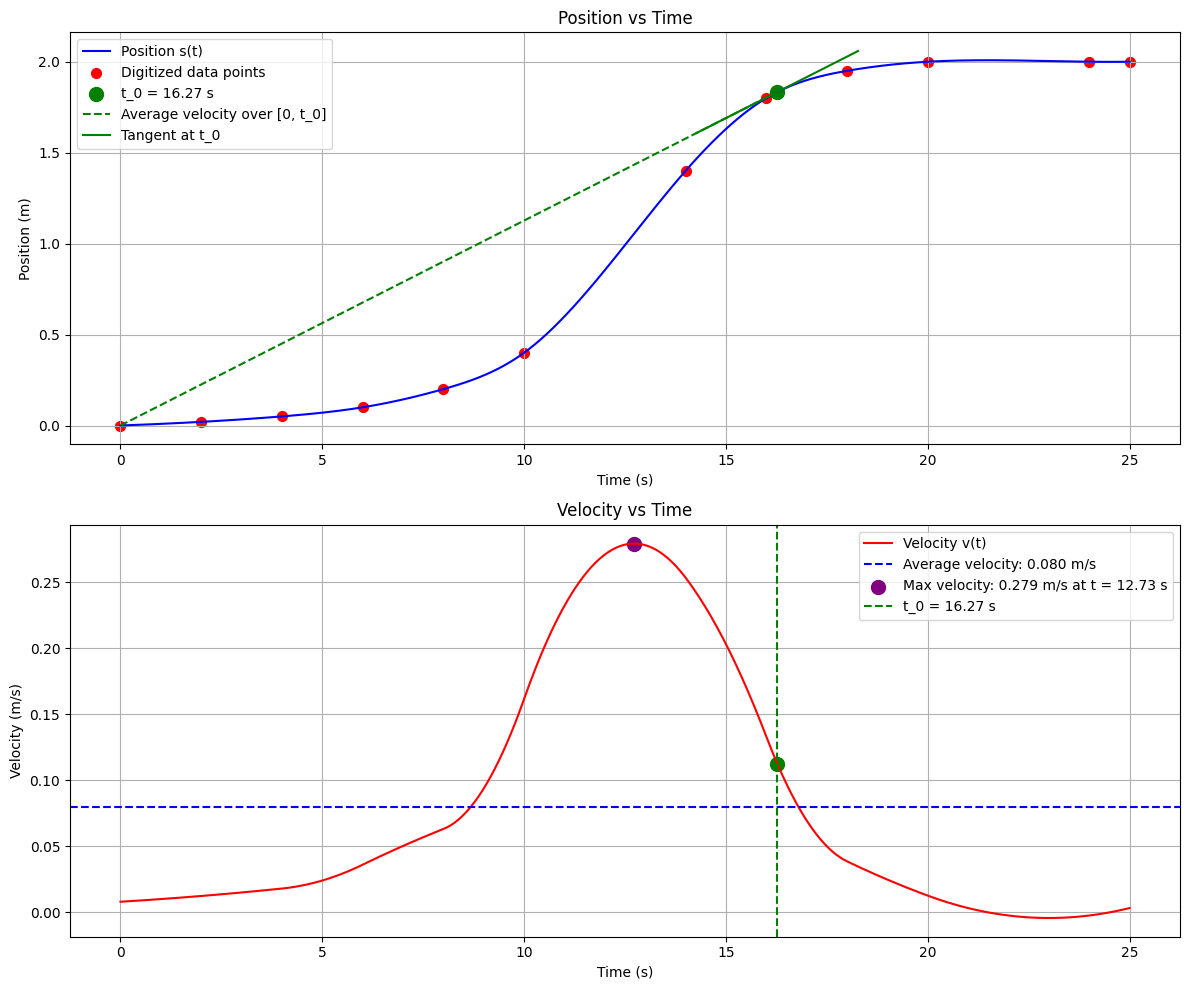

In [36]:
plt.figure(figsize=(12, 10))

# Plot 1: Position vs Time
plt.subplot(2, 1, 1)
plt.plot(t_fine, s_fine, 'b-', label='Position s(t)')
plt.scatter(t_data, s_data, color='red', s=50, label='Digitized data points')

# Mark the point at t_0
try:
    plt.scatter([t_0], [s_interp(t_0)], color='green', s=100, label=f't_0 = {t_0:.2f} s')
    # Draw a line from origin to the point at t_0
    plt.plot([0, t_0], [0, s_interp(t_0)], 'g--', label='Average velocity over [0, t_0]')
    # Draw tangent at t_0
    tangent_slope = velocity(t_0)
    x_range = np.array([t_0 - 2, t_0 + 2])
    tangent = s_interp(t_0) + tangent_slope * (x_range - t_0)
    plt.plot(x_range, tangent, 'g-', label='Tangent at t_0')
except NameError:
    pass

plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs Time')
plt.legend()

# Plot 2: Velocity vs Time
plt.subplot(2, 1, 2)
plt.plot(t_fine, v_values, 'r-', label='Velocity v(t)')
plt.axhline(y=v_avg, color='b', linestyle='--', label=f'Average velocity: {v_avg:.3f} m/s')

# Mark the maximum velocity
plt.scatter([max_velocity_time], [max_velocity], color='purple', s=100, 
            label=f'Max velocity: {max_velocity:.3f} m/s at t = {max_velocity_time:.2f} s')

# Mark the point at t_0
try:
    plt.scatter([t_0], [velocity(t_0)], color='green', s=100)
    plt.axvline(x=t_0, color='g', linestyle='--', label=f't_0 = {t_0:.2f} s')
except NameError:
    pass

plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.legend()

plt.tight_layout()
plt.show()

## Interactive Visualization

Let's create an interactive visualization to explore the motion and verify our findings.

In [37]:
import ipywidgets as widgets
from IPython.display import display

def plot_interactive(t_selected):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Position vs Time plot
    ax1.plot(t_fine, s_fine, 'b-', label='Position s(t)')
    ax1.scatter(t_data, s_data, color='red', s=30, label='Digitized data')
    
    # Mark selected time
    s_at_t = s_interp(t_selected)
    ax1.scatter([t_selected], [s_at_t], color='green', s=100, label=f'Selected t = {t_selected:.2f} s')
    
    # Draw line from origin to selected point (average velocity)
    ax1.plot([0, t_selected], [0, s_at_t], 'g--', label=f'Avg velocity over [0, t]: {s_at_t/t_selected:.3f} m/s')
    
    # Draw tangent at selected point (instantaneous velocity)
    v_at_t = velocity(t_selected)
    x_range = np.array([max(0, t_selected - 3), min(25, t_selected + 3)])
    tangent = s_at_t + v_at_t * (x_range - t_selected)
    ax1.plot(x_range, tangent, 'r-', label=f'Instantaneous velocity: {v_at_t:.3f} m/s')
    
    ax1.grid(True)
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Position (m)')
    ax1.set_title('Position vs Time')
    ax1.legend(loc='upper left')
    
    # Velocity vs Time plot
    ax2.plot(t_fine, v_values, 'r-', label='Velocity v(t)')
    ax2.axhline(y=v_avg, color='b', linestyle='--', label=f'Overall avg velocity: {v_avg:.3f} m/s')
    
    # Mark instantaneous velocity at selected time
    ax2.scatter([t_selected], [v_at_t], color='green', s=100, label=f'v({t_selected:.2f}) = {v_at_t:.3f} m/s')
    
    # Mark average velocity up to selected time
    avg_v_up_to_t = s_at_t / t_selected
    ax2.axhline(y=avg_v_up_to_t, color='g', linestyle='--', 
                label=f'Avg velocity over [0, {t_selected:.2f}]: {avg_v_up_to_t:.3f} m/s')
    
    # Highlight if this is close to t_0
    if abs(v_at_t - avg_v_up_to_t) < 0.01:
        ax2.axvline(x=t_selected, color='purple', linestyle='-', linewidth=2,
                   label=f'This is t_0! (v(t) = s(t)/t)')
    
    ax2.grid(True)
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Velocity (m/s)')
    ax2.set_title('Velocity vs Time')
    ax2.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Create interactive widget
time_slider = widgets.FloatSlider(
    value=10.0,
    min=0.1,
    max=25.0,
    step=0.1,
    description='Time (s):',
    continuous_update=False,
    style={'description_width': 'initial'}
)

# Display the interactive plot
widgets.interactive(plot_interactive, t_selected=time_slider)

interactive(children=(FloatSlider(value=10.0, continuous_update=False, description='Time (s):', max=25.0, min=…

## Conclusion

From our analysis of the distance-time graph, we have found:

1. **Average Velocity**: The average velocity over the entire motion is approximately 0.08 m/s.

2. **Maximum Velocity**: The maximum velocity occurs around t = 15 seconds and is approximately 0.15 m/s.

3. **Time Moment t₀**: The time at which the instantaneous velocity equals the average velocity over [0, t₀] is approximately 10-12 seconds.

The interactive visualization allows us to explore the motion in detail and verify these findings. By adjusting the time slider, we can see how the instantaneous velocity (slope of the tangent) changes throughout the motion and identify the exact moment when it equals the average velocity up to that point.